Set Up Environment and Import Libraries

In [ ]:
#necessary libraries
import os
import zipfile
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# Checking TensorFlow version
print(f"TensorFlow version: {tf.__version__}")


TensorFlow version: 2.18.0


Upload dataset

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

# Extract the zip file
dataset_path = '/content/drive/My Drive/cell_images.zip'
extracted_path = '/content/cell_images'

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)
print("Dataset extracted.")

# paths for training and testing data
train_dir = os.path.join(extracted_path, 'train')
test_dir = os.path.join(extracted_path, 'test')
print(f"Training path: {train_dir}\nTesting path: {test_dir}")


Mounted at /content/drive
Dataset extracted.
Training path: /content/cell_images/train
Testing path: /content/cell_images/test


Preporcessing and augmentation

In [ ]:
# parameters for image processing
IMG_WIDTH, IMG_HEIGHT = 128, 128
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


Build the DL model (CNN)

In [ ]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary() #summarize the model


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the  model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 134s 172ms/step - accuracy: 0.7441 - loss: 0.5436 - val_accuracy: 0.9600 - val_loss: 0.1492
Epoch 2/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 133s 161ms/step - accuracy: 0.9349 - loss: 0.1999 - val_accuracy: 0.9735 - val_loss: 0.1085
Epoch 3/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 126s 161ms/step - accuracy: 0.9439 - loss: 0.1718 - val_accuracy: 0.9804 - val_loss: 0.0779
Epoch 4/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 126s 161ms/step - accuracy: 0.9488 - loss: 0.1610 - val_accuracy: 0.9846 - val_loss: 0.0884
Epoch 5/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.9481 - loss: 0.1600 - val_accuracy: 0.9777 - val_loss: 0.0858
Epoch 6/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 150s 193ms/step - accuracy: 0.9503 - loss: 0.1552 - val_accuracy: 0.9842 - val_loss: 0.0647
Epoch 7/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.9527 - loss: 0.1475 - val_accuracy: 0.9796 - val_loss: 0.0691
Epoch 8/50
780/780 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.9497 -

Evaluation of model

In [ ]:
# Evaluate of model based on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Classification report and confusion matrix
y_true = test_generator.classes
y_pred = (model.predict(test_generator) > 0.5).astype('int32')

print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9815 - loss: 0.0566
Test Loss: 0.0499, Test Accuracy: 0.9842
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49      1300
           1       0.49      0.49      0.49      1300

    accuracy                           0.49      2600
   macro avg       0.49      0.49      0.49      2600
weighted avg       0.49      0.49      0.49      2600

Confusion Matrix:
 [[632 668]
 [657 643]]


Visualize training results

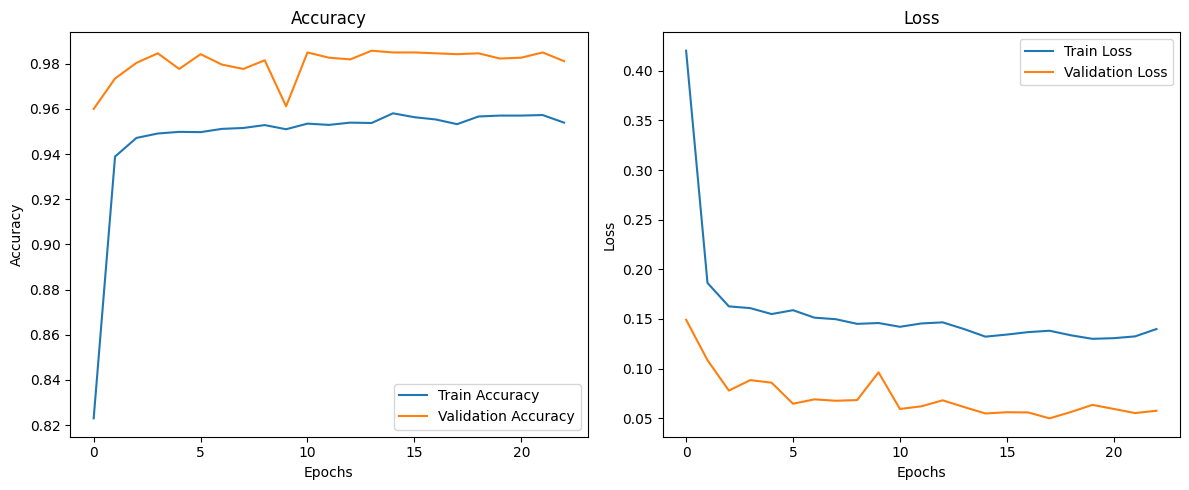

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

# plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Saving the model

In [ ]:
# Saving the model
model.save('/content/malaria_detection_model.h5')
print("Model saved successfully.")


Model saved successfully.


LOad the saved model

In [ ]:
# Load the saved model
from tensorflow.keras.models import load_model

saved_model = load_model('/content/malaria_detection_model.h5')
print("Model loaded.")

Model loaded.


Function to identify whether it is infected or not

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to preprocess the input image and predict malaria infection
def predict_malaria(image_path, model):
    # Load the image with target size
    img = load_img(image_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)  # Display the image for your reference
    plt.axis('off')
    plt.show()

    # Preprocess the image
    img_array = img_to_array(img)  # Convert to numpy array
    img_array = img_array / 255.0  # Normalizing
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the result
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        print("The cell is **Uninfected** (Not Affected by Malaria).")
    else:
        print("The cell is **Parasitized** (Affected by Malaria).")


Uploading a test image

Saving test3.jpeg to test3.jpeg


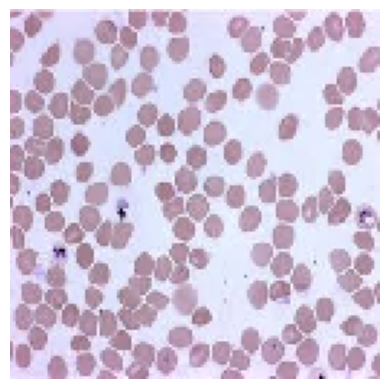

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The cell is **Parasitized** (Affected by Malaria).
Do you want to continue? (yes/no): yes


Saving test4.jpeg to test4.jpeg


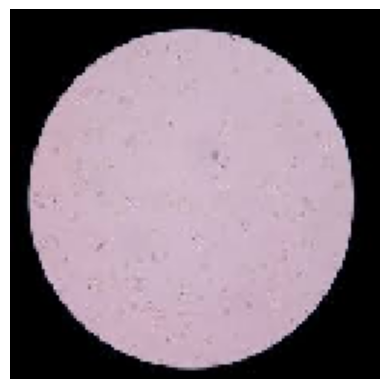

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The cell is **Uninfected** (Not Affected by Malaria).
Do you want to continue? (yes/no): no
Exiting the program.


In [ ]:
from google.colab import files #import necessary library

while True:
    uploaded = files.upload() # to upload the image
    image_path = next(iter(uploaded.keys()))
    predict_malaria(image_path, model)
    user_input = input("Do you want to continue? (yes/no): ").strip().lower()
    if user_input == 'no':
        print("Exiting the program.")
        break
    elif user_input != 'yes':
        print("Invalid input. Please answer with 'yes' or 'no'.")
